36 scatterplots have been plotted to show the relationship between all the independent and dependent variables with each other 

read_table reference from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html seaborn.pairplot 

reference from https://seaborn.pydata.org/generated/seaborn.pairplot.html

[<matplotlib.patches.PathPatch object at 0x0000014543E387F0>, <matplotlib.patches.PathPatch object at 0x0000014545AD7E80>]
0 PathPatch6((0.75, 42.82) ...)
1 PathPatch6((1.75, 50.105) ...)
[<matplotlib.patches.PathPatch object at 0x0000014545B1FC50>, <matplotlib.patches.PathPatch object at 0x0000014545B32048>]
0 PathPatch6((0.75, 8.8025) ...)
1 PathPatch6((1.75, 13.0475) ...)
[<matplotlib.patches.PathPatch object at 0x00000145461D56D8>, <matplotlib.patches.PathPatch object at 0x00000145461DF908>]
0 PathPatch6((0.75, 35) ...)
1 PathPatch6((1.75, 41.1175) ...)
[<matplotlib.patches.PathPatch object at 0x0000014546228E10>, <matplotlib.patches.PathPatch object at 0x0000014546242208>]
0 PathPatch6((0.75, 32.3425) ...)
1 PathPatch6((1.75, 34.38) ...)
[<matplotlib.patches.PathPatch object at 0x000001454628D898>, <matplotlib.patches.PathPatch object at 0x0000014546299C50>]
0 PathPatch6((0.75, 118.18) ...)
1 PathPatch6((1.75, 107.308) ...)
[<matplotlib.patches.PathPatch object at 0x00000145462EF2

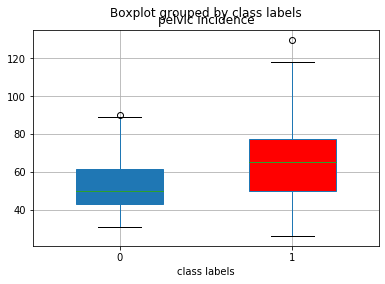

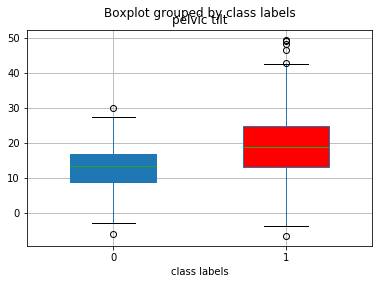

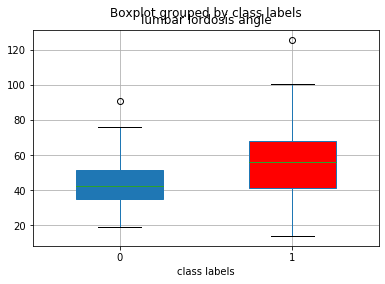

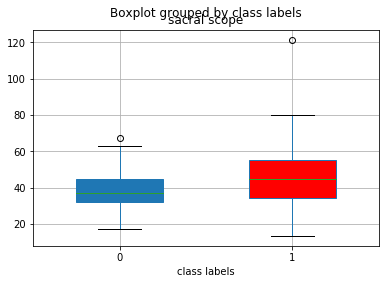

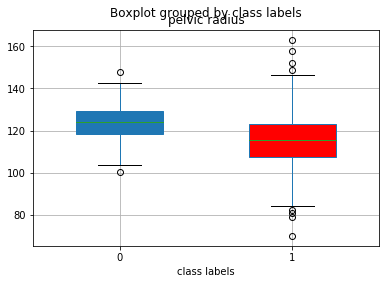

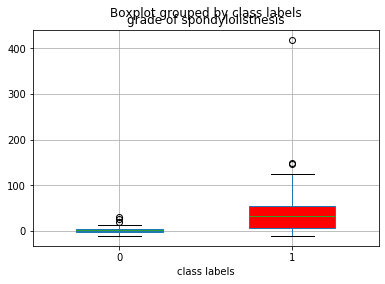

In [3]:
def setcolor(bp):
    for key in bp.keys():
        print(bp[key]["boxes"])
        for i, item in enumerate(bp[key]["boxes"]):
            print(i, item)
            if i == 1:
                item.set_facecolor('r')
bp=df.boxplot('pelvic incidence',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
bp=df.boxplot('pelvic tilt',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
bp=df.boxplot('lumbar lordosis angle',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
bp=df.boxplot('sacral scope',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
bp=df.boxplot('pelvic radius',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
bp=df.boxplot('grade of spondylolisthesis',by='class labels',patch_artist=True, return_type="dict",widths=0.5)
setcolor(bp)
# [a, b]
# [(0,a), (1,b)]

6 boxplots have been made of the independent variables which are in the first 6 columns of the table, for classes 0 and 1

Colour red indicates the class 1 which is "abnormal" and blue indicates class 0 which is "normal"

df.boxplot reference from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html


In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
def train_test_split(df, train_0, train_1):
    all_0_data = df.loc[df["class labels"] == "0"]    
    all_1_data = df.loc[df["class labels"] == "1"]
    train_data = pd.concat([all_0_data.head(train_0), all_1_data.head(train_1)])
    test_data = pd.concat([all_0_data.tail(all_0_data.shape[0] - train_0), all_1_data.tail(all_1_data.shape[0] - train_1)])
    return train_data, test_data
train_data, test_data = train_test_split(df, 70, 140)
train_data.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral scope,pelvic radius,grade of spondylolisthesis,class labels
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0


The dataframe has been divided into test data and train data with the first 70 rows of Class 0 and the first 140 rows of Class 1 in the train_data and the rest of the data in the test_data.

pd.concat reference from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

test train split reference from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.neighbors import KNeighborsClassifier
X_train = train_data.iloc[:, 0:6].values
Y_train = train_data.iloc[:, 6:7].values
X_test = test_data.iloc[:, 0:6].values
Y_test = test_data.iloc[:, 6:7].values
knn = KNeighborsClassifier(n_neighbors=10,metric="euclidean")
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

The training and the testing dataset is further divided into X_train,Y_train and X_test,Y_test. Here, X corresponds to the input variables columns which include the independent variables from columns 1-6. Y corresponds to the output varibale which is the dependent varibale in column 7 i.e. "class labels".

Using the Euclidean Distance Metric, the 10 nearest neighbours of the datapoint are found using the KNeighboursClassifier package

iloc function reference from https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/

warning removing code referred from https://stackoverflow.com/questions/29086398/sklearn-turning-off-warnings

KNeighboursClassifier reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
knn.fit(X_train, Y_train)
Y_predictions = knn.predict(X_test)
Y_predictions

array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)

First the training model is fit using knn.fit method then predictions for the testing dataset is made

knn.fit and Y_predication reference from https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

knn.fit and Y_predication reference from https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

In [7]:
from sklearn import linear_model
from sklearn import metrics
k_range=range(208,-1,-3)
train_scores=[]
test_scores=[]
train_errors=[]
test_errors=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    train_score=knn.score(X_train,Y_train)
    test_score=knn.score(X_test,Y_test)
    train_scores.append((k,1-train_score))
    test_scores.append((k,1-test_score))

All the data in the database is tested with k nearest neighbours where k belongs to {208,205,...,7,4,1}

score function reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

append and range reference from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

Text(0, 0.5, 'Error Rate')

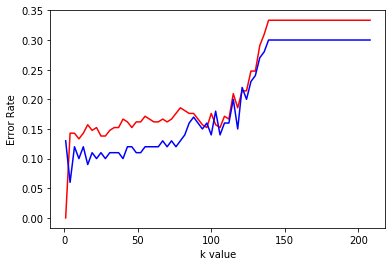

In [8]:
plt.plot(*zip(*train_scores), color='red', label="Training Errors")
plt.plot(*zip(*test_scores), color='blue', label="Testing Errors")
plt.xlabel("k value")
plt.ylabel("Error Rate")

Error rate of the training and testing datasets for different vaues of k is plotted in a graph

plt.plot reference from https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

zip() function reference from https://www.programiz.com/python-programming/methods/built-in/zip

In [9]:
print("Train errors at different values of k=")
train_scores

Train errors at different values of k=


[(208, 0.33333333333333337),
 (205, 0.33333333333333337),
 (202, 0.33333333333333337),
 (199, 0.33333333333333337),
 (196, 0.33333333333333337),
 (193, 0.33333333333333337),
 (190, 0.33333333333333337),
 (187, 0.33333333333333337),
 (184, 0.33333333333333337),
 (181, 0.33333333333333337),
 (178, 0.33333333333333337),
 (175, 0.33333333333333337),
 (172, 0.33333333333333337),
 (169, 0.33333333333333337),
 (166, 0.33333333333333337),
 (163, 0.33333333333333337),
 (160, 0.33333333333333337),
 (157, 0.33333333333333337),
 (154, 0.33333333333333337),
 (151, 0.33333333333333337),
 (148, 0.33333333333333337),
 (145, 0.33333333333333337),
 (142, 0.33333333333333337),
 (139, 0.33333333333333337),
 (136, 0.30952380952380953),
 (133, 0.29047619047619044),
 (130, 0.24761904761904763),
 (127, 0.24761904761904763),
 (124, 0.2142857142857143),
 (121, 0.2142857142857143),
 (118, 0.18571428571428572),
 (115, 0.20952380952380956),
 (112, 0.16666666666666663),
 (109, 0.17142857142857137),
 (106, 0.1523809

The least train error is 0.133 at k=10

In [10]:
print("Test errors at different values of k=")
test_scores

Test errors at different values of k=


[(208, 0.30000000000000004),
 (205, 0.30000000000000004),
 (202, 0.30000000000000004),
 (199, 0.30000000000000004),
 (196, 0.30000000000000004),
 (193, 0.30000000000000004),
 (190, 0.30000000000000004),
 (187, 0.30000000000000004),
 (184, 0.30000000000000004),
 (181, 0.30000000000000004),
 (178, 0.30000000000000004),
 (175, 0.30000000000000004),
 (172, 0.30000000000000004),
 (169, 0.30000000000000004),
 (166, 0.30000000000000004),
 (163, 0.30000000000000004),
 (160, 0.30000000000000004),
 (157, 0.30000000000000004),
 (154, 0.30000000000000004),
 (151, 0.30000000000000004),
 (148, 0.30000000000000004),
 (145, 0.30000000000000004),
 (142, 0.30000000000000004),
 (139, 0.30000000000000004),
 (136, 0.28),
 (133, 0.27),
 (130, 0.24),
 (127, 0.22999999999999998),
 (124, 0.19999999999999996),
 (121, 0.21999999999999997),
 (118, 0.15000000000000002),
 (115, 0.19999999999999996),
 (112, 0.16000000000000003),
 (109, 0.16000000000000003),
 (106, 0.14),
 (103, 0.18000000000000005),
 (100, 0.14),
 (

The lowest test error is 0.060 at k=4

Which makes k=4 as the most suitable k value

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)
Y_predictions = knn.predict(X_test)
print("Confusion Matrix=")
print(confusion_matrix(Y_test, Y_predictions))

Confusion Matrix=
[[20 10]
 [ 1 69]]


True Negative=20,False Positive=10,False Negative=1,True Positive=69

confusion matrix reference from https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

confusion matrix reference from https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

In [12]:
m=confusion_matrix(Y_test, Y_predictions)
tn=m[0][0]
fp=m[0][1]
fn=m[1][0]
tp=m[1][1]
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
print("True Positive Rate=",tpr)

True Positive Rate= 0.9857142857142858


In [13]:
print("True Negative rate=",tnr)

True Negative rate= 0.6666666666666666


In [14]:
print(classification_report(Y_test, Y_predictions))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78        30
           1       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



Classification Report shows the Precision and F-score for classes 0 and 1 when k=4

classification_report reference from https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

classification_report reference from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [15]:
import math
N=list(range(10,211,10))
for i in N:
    train_0=(train_data.loc[train_data["class labels"] == "0"][0:math.floor(i/3)])
    train_1=(train_data.loc[train_data["class labels"] == "1"][0:i-(math.floor(i/3))])
    train_set=pd.concat([train_0,train_1])
    print(train_set)

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral scope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
5               40.25        13.92                  25.12         26.33   
6               53.43        15.86                  37.17         37.57   

     pelvic radius  grade of spondylolisthesis class labels  
210         127.63                        7.99            0  
211         125.85                        2.00    

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral scope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
215             30.74        13.35                  35.90         17.39   
216             50.91         6.68                  30.90         44.24   
217             38.13         6.56                  50.45         31.57   
218             51.62        15.97                  35.00         35.66   
219             64.31        26.33                  50.96         37.98   
220             44.49        21.79                  31.47         22.70   
221             54.95         5.87                  53.00         49.09   
222             56.10    

The training dataset from b(iii) has been divided into N training datasets where N belong to {10,20,30,...,210}

Also, for every N the training dataset has N/3 rows of class 0 and N-N/3 rows of class 1

math.floor reference from https://www.tutorialspoint.com/python/number_floor.html

pd.concat reference from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [16]:
from sklearn.neighbors import KNeighborsClassifier
train_e=[]
test_e=[]
N=list(range(10,211,10))
min_test_error = []
for i in N:
    
    train_0=(train_data.loc[train_data["class labels"] == "0"][0:math.floor(i/3)])
    train_1=(train_data.loc[train_data["class labels"] == "1"][0:i-(math.floor(i/3))])
    train_set=pd.concat([train_0,train_1])
    x_train=train_set.iloc[:, 0:6].values
    y_train=train_set.iloc[:, 6:7].values

    train_s=[]
    test_s=[]
    for K in range(1,i,5):
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(X_test)
        te_score=knn.score(X_test,Y_test)
        test_s.append(1-te_score)
    print(test_s)
    print(min(test_s))

    min_test_error.append(min(test_s))

[0.25, 0.32999999999999996]
0.25
[0.21999999999999997, 0.19999999999999996, 0.29000000000000004, 0.30000000000000004]
0.19999999999999996
[0.21999999999999997, 0.24, 0.26, 0.26, 0.30000000000000004, 0.30000000000000004]
0.21999999999999997
[0.76, 0.30000000000000004, 0.25, 0.26, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
0.25
[0.78, 0.6799999999999999, 0.38, 0.31000000000000005, 0.31000000000000005, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
0.30000000000000004
[0.74, 0.73, 0.56, 0.54, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
0.29000000000000004
[0.72, 0.69, 0.56, 0.5700000000000001, 0.4, 0.29000000000000004, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.3000

The minimum test eror for each N is printed for all K values belonging in {1,6,11,..,196}

Text(0.5, 1.0, 'Learning Curve')

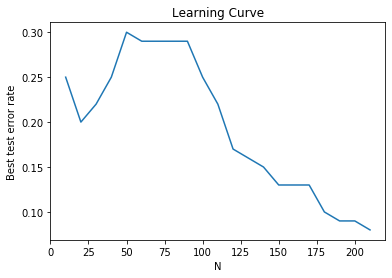

In [17]:
plt.plot(N,min_test_error)
plt.xlabel("N")
plt.ylabel("Best test error rate")
plt.title("Learning Curve")

The Learning Curve shows the relationship betweeen the different training datasets-N and the minimum test errors for the optimal k value

In [18]:
from sklearn.neighbors import DistanceMetric
manhattan_krange=range(1,200,5)
train_sc=[]
test_sc=[]
train_err=[]
test_err=[]
for k in manhattan_krange:
    knn = KNeighborsClassifier(n_neighbors=k,metric="manhattan",p=1)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    train_sc=knn.score(X_train,Y_train)
    test_sc=knn.score(X_test,Y_test)
    train_err.append((k,1-train_sc))
    test_err.append((k,1-test_sc))

Here, the manhattan distance metric is use for finding the k nearest neighbours, where k belongs to {1,6,11,...,196}

The distance function of Manhattan distance is sum(|x - y|)

sklearn.neighbours.DistanceMetric reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Minimum values of train errors of Manhattan Distance at different k is
[(1, 0.0), (6, 0.13809523809523805), (11, 0.1428571428571429), (16, 0.1333333333333333), (21, 0.14761904761904765), (26, 0.16666666666666663), (31, 0.16666666666666663), (36, 0.16190476190476188), (41, 0.16666666666666663), (46, 0.17142857142857137), (51, 0.17142857142857137), (56, 0.18571428571428572), (61, 0.17619047619047623), (66, 0.18095238095238098), (71, 0.17619047619047623), (76, 0.18095238095238098), (81, 0.16666666666666663), (86, 0.1523809523809524), (91, 0.18095238095238098), (96, 0.17619047619047623), (101, 0.19999999999999996), (106, 0.2047619047619048), (111, 0.21904761904761905), (116, 0.22857142857142854), (121, 0.24285714285714288), (126, 0.26190476190476186), (131, 0.3047619047619048), (136, 0.32380952380952377), (141, 0.33333333333333337), (146, 0.33333333333333337), (151, 0.33333333333333337), (156, 0.33333333333333337), (161, 0.33333333333333337), (166, 0.33333333333333337), (171, 0.33333333333

Text(0, 0.5, 'train error rate')

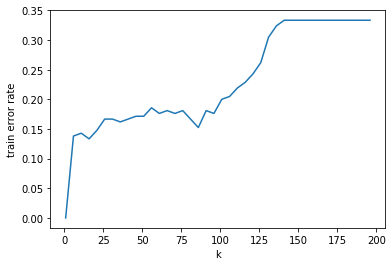

In [19]:
print("Minimum values of train errors of Manhattan Distance at different k is")
print(train_err)
plt.plot(*zip(*train_err))
plt.xlabel("k")
plt.ylabel("train error rate")

Minimum train error is 0.133 at k=16

Minimum values of test errors of Manhattan Distance at different k is
[(1, 0.12), (6, 0.10999999999999999), (11, 0.10999999999999999), (16, 0.12), (21, 0.12), (26, 0.10999999999999999), (31, 0.12), (36, 0.13), (41, 0.13), (46, 0.13), (51, 0.14), (56, 0.13), (61, 0.15000000000000002), (66, 0.15000000000000002), (71, 0.14), (76, 0.14), (81, 0.16000000000000003), (86, 0.15000000000000002), (91, 0.19999999999999996), (96, 0.19999999999999996), (101, 0.21999999999999997), (106, 0.20999999999999996), (111, 0.22999999999999998), (116, 0.20999999999999996), (121, 0.21999999999999997), (126, 0.24), (131, 0.28), (136, 0.28), (141, 0.30000000000000004), (146, 0.30000000000000004), (151, 0.30000000000000004), (156, 0.30000000000000004), (161, 0.30000000000000004), (166, 0.30000000000000004), (171, 0.30000000000000004), (176, 0.30000000000000004), (181, 0.30000000000000004), (186, 0.30000000000000004), (191, 0.30000000000000004), (196, 0.30000000000000004)]


Text(0, 0.5, 'test error rate')

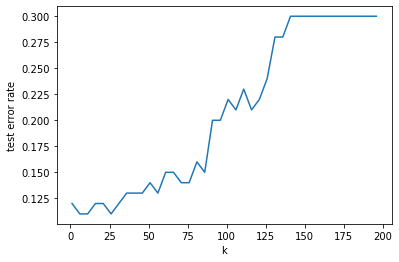

In [20]:
print("Minimum values of test errors of Manhattan Distance at different k is")
print(test_err)
plt.plot(*zip(*test_err))
plt.xlabel("k")
plt.ylabel("test error rate")

The Minimum test error value is 0.109 at k=6,11 and 26

The best k value will be the one with minimum overfitting

Overfitting ususally occours when the value of k is small 

Small value of k also results in high variance which would mean that even small changes in the training data would lead to large changes in the responses 

So, the best k value would be the one with low testing error and high bias which is at k=26

In [21]:
log_p_range=np.arange(0.1,1.1,0.1)
print("log p=",log_p_range)
p_range=np.asarray([10**i for i in log_p_range])
print("p=",p_range)
train_sc=[]
test_sc=[]
train_er=[]
test_er=[]
for r in p_range:
    knn = KNeighborsClassifier(n_neighbors=26,metric="minkowski",p=r)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    train_sc=knn.score(X_train,Y_train)
    test_sc=knn.score(X_test,Y_test)
    train_er.append((1-train_sc))
    test_er.append((r,1-test_sc))

log p= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
p= [ 1.25892541  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171
  5.01187234  6.30957344  7.94328235 10.        ]


Here, best k value found in manhattan distance is used to calculate the minimum test error rate for different log p values where log p (base 10) belongs to {0.1,0.2,...,1}

p can be found out using np.asarray([10**i for i in log_p_range]), 

since, if log (base b) x=y

then x=b^y

np.asarray reference from https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html


sklearn.neighbours.DistanceMetric reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Test errors for different p of Minkowski Distance is= [(1.2589254117941673, 0.09999999999999998), (1.5848931924611136, 0.09999999999999998), (1.9952623149688797, 0.10999999999999999), (2.51188643150958, 0.09999999999999998), (3.1622776601683795, 0.10999999999999999), (3.9810717055349722, 0.09999999999999998), (5.011872336272724, 0.10999999999999999), (6.309573444801933, 0.10999999999999999), (7.943282347242816, 0.10999999999999999), (10.0, 0.10999999999999999)]
Minimum test error is at= (1.2589254117941673, 0.09999999999999998)


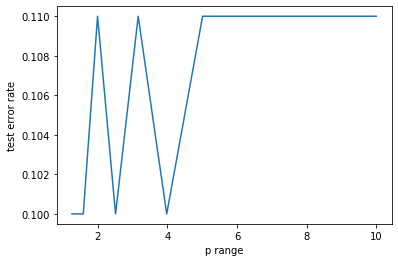

In [22]:
print("Test errors for different p of Minkowski Distance is=",test_er)
min_test_er=min(test_er)
plt.plot(*zip(*test_er))
plt.xlabel("p range")
plt.ylabel("test error rate")
print("Minimum test error is at=",min_test_er)

A plot is made for showing the relationship between p and test error rates

The minimum test error rate is 0.099 which is found at the log p values of 0.1,0.2,0.4 and 0.6

Therefore, the best log p value is at 0.6 (p=3.981) as after this value the test errros only increase in the graph

In [23]:
cheb_krange=range(1,200,5)
train_c=[]
test_c=[]
train_e=[]
test_e=[]
for c in cheb_krange:
    knn = KNeighborsClassifier(n_neighbors=c,metric="chebyshev")
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    train_c=knn.score(X_train,Y_train)
    test_c=knn.score(X_test,Y_test)
    train_e.append((c,1-train_c))
    test_e.append((c,1-test_c))

The distance function of Chebyshev Distance is max(|x - y|)

sklearn.neighbours.DistanceMetric reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Minimum values of train errors of Chebyshev Distance at different k is
[(1, 0.0), (6, 0.1523809523809524), (11, 0.1523809523809524), (16, 0.14761904761904765), (21, 0.1333333333333333), (26, 0.15714285714285714), (31, 0.1428571428571429), (36, 0.1523809523809524), (41, 0.1428571428571429), (46, 0.16190476190476188), (51, 0.16666666666666663), (56, 0.16666666666666663), (61, 0.17142857142857137), (66, 0.16190476190476188), (71, 0.18095238095238098), (76, 0.17619047619047623), (81, 0.17142857142857137), (86, 0.17142857142857137), (91, 0.16190476190476188), (96, 0.16190476190476188), (101, 0.17142857142857137), (106, 0.17142857142857137), (111, 0.18095238095238098), (116, 0.17619047619047623), (121, 0.20952380952380956), (126, 0.2238095238095238), (131, 0.24761904761904763), (136, 0.319047619047619), (141, 0.33333333333333337), (146, 0.33333333333333337), (151, 0.33333333333333337), (156, 0.33333333333333337), (161, 0.33333333333333337), (166, 0.33333333333333337), (171, 0.333333333333333

Text(0, 0.5, 'train error rate')

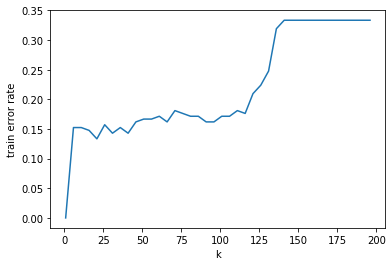

In [24]:
print("Minimum values of train errors of Chebyshev Distance at different k is")
print(train_e)
plt.plot(*zip(*train_e))
plt.xlabel("k")
plt.ylabel("train error rate")

The Minimum train error is 0.133 at k=21

Minimum values of test errors of Chebyshev Distance at different k is
[(1, 0.13), (6, 0.09999999999999998), (11, 0.12), (16, 0.07999999999999996), (21, 0.10999999999999999), (26, 0.12), (31, 0.12), (36, 0.09999999999999998), (41, 0.13), (46, 0.12), (51, 0.12), (56, 0.12), (61, 0.14), (66, 0.13), (71, 0.14), (76, 0.10999999999999999), (81, 0.14), (86, 0.12), (91, 0.15000000000000002), (96, 0.14), (101, 0.18999999999999995), (106, 0.18000000000000005), (111, 0.18000000000000005), (116, 0.18000000000000005), (121, 0.20999999999999996), (126, 0.20999999999999996), (131, 0.25), (136, 0.28), (141, 0.30000000000000004), (146, 0.30000000000000004), (151, 0.30000000000000004), (156, 0.30000000000000004), (161, 0.30000000000000004), (166, 0.30000000000000004), (171, 0.30000000000000004), (176, 0.30000000000000004), (181, 0.30000000000000004), (186, 0.30000000000000004), (191, 0.30000000000000004), (196, 0.30000000000000004)]


Text(0, 0.5, 'test error rate')

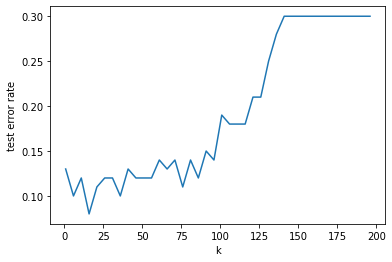

In [25]:
print("Minimum values of test errors of Chebyshev Distance at different k is")
print(test_e)
plt.plot(*zip(*test_e))
plt.xlabel("k")
plt.ylabel("test error rate")

The Minimum test error is 0.079 at k=16

Therefore, k=16 is the best k value

In [26]:
maha_krange=range(1,200,5)
tr_sc=[]
te_sc=[]
tr_err=[]
te_err=[]
for m in maha_krange:
    knn = KNeighborsClassifier(n_neighbors=m,metric="mahalanobis", algorithm="brute", metric_params={'V': np.cov(X_train)})
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    tr_sc=knn.score(X_train,Y_train)
    te_sc=knn.score(X_test,Y_test)
    tr_err.append((m,1-tr_sc))
    te_err.append((m,1-te_sc))

Distance function of mahalanobis distance is sqrt((x - y)' V^-1 (x - y)) where V is the covariance matrix of the independent variables in the training dataset

algorithm='brute', metric_params={'V': np.cov(X_train)} reference from https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347


sklearn.neighbours.DistanceMetric reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Minimum values of train errors of Mahalanobis Distance at different k is
[(1, 0.0), (6, 0.11904761904761907), (11, 0.18571428571428572), (16, 0.17619047619047623), (21, 0.17619047619047623), (26, 0.18571428571428572), (31, 0.18095238095238098), (36, 0.18095238095238098), (41, 0.18571428571428572), (46, 0.18571428571428572), (51, 0.19047619047619047), (56, 0.19047619047619047), (61, 0.2047619047619048), (66, 0.1952380952380952), (71, 0.21904761904761905), (76, 0.2142857142857143), (81, 0.23809523809523814), (86, 0.23333333333333328), (91, 0.2523809523809524), (96, 0.24285714285714288), (101, 0.2857142857142857), (106, 0.30000000000000004), (111, 0.2952380952380952), (116, 0.32380952380952377), (121, 0.3285714285714286), (126, 0.3285714285714286), (131, 0.33333333333333337), (136, 0.33333333333333337), (141, 0.33333333333333337), (146, 0.33333333333333337), (151, 0.33333333333333337), (156, 0.33333333333333337), (161, 0.33333333333333337), (166, 0.33333333333333337), (171, 0.333333333333

Text(0, 0.5, 'train error rate')

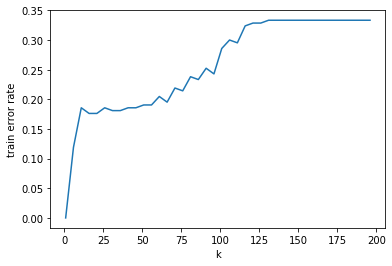

In [27]:
print("Minimum values of train errors of Mahalanobis Distance at different k is")
print(tr_err)
plt.plot(*zip(*tr_err))
plt.xlabel("k")
plt.ylabel("train error rate")

The Minimum train error is 0.119 at k=6

Minimum values of test errors of Mahalanobis Distance at different k is
[(1, 0.18000000000000005), (6, 0.16000000000000003), (11, 0.18999999999999995), (16, 0.19999999999999996), (21, 0.22999999999999998), (26, 0.20999999999999996), (31, 0.20999999999999996), (36, 0.22999999999999998), (41, 0.22999999999999998), (46, 0.24), (51, 0.25), (56, 0.26), (61, 0.26), (66, 0.26), (71, 0.27), (76, 0.27), (81, 0.25), (86, 0.27), (91, 0.28), (96, 0.26), (101, 0.28), (106, 0.29000000000000004), (111, 0.29000000000000004), (116, 0.29000000000000004), (121, 0.30000000000000004), (126, 0.30000000000000004), (131, 0.30000000000000004), (136, 0.30000000000000004), (141, 0.30000000000000004), (146, 0.30000000000000004), (151, 0.30000000000000004), (156, 0.30000000000000004), (161, 0.30000000000000004), (166, 0.30000000000000004), (171, 0.30000000000000004), (176, 0.30000000000000004), (181, 0.30000000000000004), (186, 0.30000000000000004), (191, 0.30000000000000004), (196, 0.30000000000000004)]


Text(0, 0.5, 'test error rate')

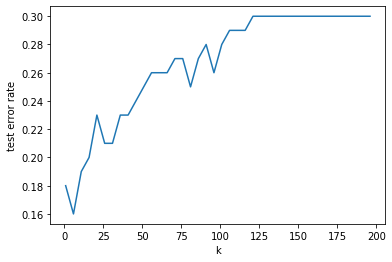

In [28]:
print("Minimum values of test errors of Mahalanobis Distance at different k is")
print(te_err)
plt.plot(*zip(*te_err))
plt.xlabel("k")
plt.ylabel("test error rate")

The Minimum test error value is 0.160 at k=6

Therefore, k=6 is the best k value as after this value the test error rate only increases in the graph

In [29]:
print("Test errors for the best k values in different metrics using Majority Polling")
n_list=[["Euclidean",4,0.060],["Manhattan",26,0.109],["Chebyshev",16,0.079],["Mahalanobis",6,0.160]]
print("| Distance Metric | K value  | Test Error")
for item in n_list:
    print("|", item[0], " "*(14-len(item[0])), "|", item[1], " "*(7-len(str(item[1]))), "|", item[2], " "*(9-len(str(item[2]))))

Test errors for the best k values in different metrics using Majority Polling
| Distance Metric | K value  | Test Error
| Euclidean       | 4        | 0.06      
| Manhattan       | 26       | 0.109     
| Chebyshev       | 16       | 0.079     
| Mahalanobis     | 6        | 0.16      


The minimum test error was found by using the Euclidean distance metric. So, it can be said that for this dataset using the Euclidean Distace Metric is the best method to get least number of errors. 

On the other hand, Euclidean distance metric gives the least training error at k=4 which could result into overfitting so we can also use Manhattan distnace metric or Chebyshev distance metric for this dataset as their training error are not so large and the graph will have smoother boundaries and be less overfit. 

reference from https://www.youtube.com/watch?v=B9BRuhqEb2Q

In [31]:
w_k_range=range(1,200,5)
e_train_scores=[]
e_test_scores=[]
e_train_errors=[]
e_test_errors=[]
for k in w_k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean",weights="distance")
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    e_train_score=knn.score(X_train,Y_train)
    e_test_score=knn.score(X_test,Y_test)
    e_train_scores.append((k,1-e_train_score))
    e_test_scores.append((k,1-e_test_score))

In weighed decision, closer neighbors of a query point have greater influence than neighbors which are further away. 
Here, weighed decision is made by selecting the nearest neighbours using Euclidean distance.

The distance function in Euclidean distance is sqrt(sum((x - y)^2))

weights="distance" referred from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Test errors of Euclidean Distance at different k is
[(1, 0.13), (6, 0.09999999999999998), (11, 0.12), (16, 0.10999999999999999), (21, 0.10999999999999999), (26, 0.10999999999999999), (31, 0.10999999999999999), (36, 0.10999999999999999), (41, 0.10999999999999999), (46, 0.10999999999999999), (51, 0.10999999999999999), (56, 0.10999999999999999), (61, 0.10999999999999999), (66, 0.10999999999999999), (71, 0.10999999999999999), (76, 0.12), (81, 0.13), (86, 0.13), (91, 0.14), (96, 0.14), (101, 0.12), (106, 0.14), (111, 0.14), (116, 0.13), (121, 0.13), (126, 0.13), (131, 0.14), (136, 0.14), (141, 0.17000000000000004), (146, 0.18999999999999995), (151, 0.18999999999999995), (156, 0.19999999999999996), (161, 0.22999999999999998), (166, 0.25), (171, 0.27), (176, 0.27), (181, 0.27), (186, 0.27), (191, 0.28), (196, 0.28)]


Text(0.5, 1.0, 'Test errors of Euclidean Distance')

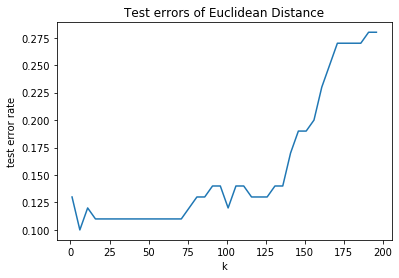

In [32]:
print("Test errors of Euclidean Distance at different k is")
print(e_test_scores)
plt.plot(*zip(*e_test_scores))
plt.xlabel("k")
plt.ylabel("test error rate")
plt.title("Test errors of Euclidean Distance")

The Minimum test error is 0.099 at k=6 

Therefore, the best k value is 6 because after this value the test error rates only incerase in the graph.

In [33]:
m_train_scores=[]
m_test_scores=[]
m_train_errors=[]
m_test_errors=[]
for k in w_k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric="manhattan",weights="distance")
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    m_train_score=knn.score(X_train,Y_train)
    m_test_score=knn.score(X_test,Y_test)
    m_train_scores.append((k,1-m_train_score))
    m_test_scores.append((k,1-m_test_score))

Test errors of Manhattan Distance at different k is
[(1, 0.12), (6, 0.10999999999999999), (11, 0.10999999999999999), (16, 0.12), (21, 0.10999999999999999), (26, 0.09999999999999998), (31, 0.10999999999999999), (36, 0.10999999999999999), (41, 0.10999999999999999), (46, 0.10999999999999999), (51, 0.12), (56, 0.12), (61, 0.13), (66, 0.13), (71, 0.10999999999999999), (76, 0.12), (81, 0.14), (86, 0.14), (91, 0.13), (96, 0.13), (101, 0.15000000000000002), (106, 0.15000000000000002), (111, 0.15000000000000002), (116, 0.15000000000000002), (121, 0.15000000000000002), (126, 0.15000000000000002), (131, 0.15000000000000002), (136, 0.16000000000000003), (141, 0.17000000000000004), (146, 0.18000000000000005), (151, 0.18999999999999995), (156, 0.20999999999999996), (161, 0.24), (166, 0.25), (171, 0.27), (176, 0.27), (181, 0.27), (186, 0.27), (191, 0.28), (196, 0.29000000000000004)]


Text(0.5, 1.0, 'Test errors of Manhattan Distance')

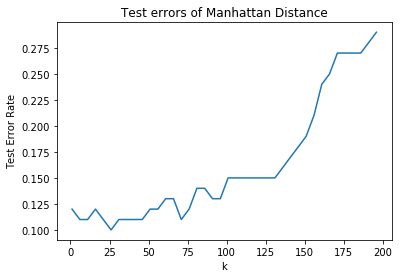

In [34]:
print("Test errors of Manhattan Distance at different k is")
print(m_test_scores)
plt.plot(*zip(*m_test_scores))
plt.xlabel("k")
plt.ylabel("Test Error Rate")
plt.title("Test errors of Manhattan Distance")

The minimum test error is 0.099 at k=26

Therefore, the best k value is 26, after this value the test errors only increase

In [35]:
c_train_scores=[]
c_test_scores=[]
c_train_errors=[]
c_test_errors=[]
for k in w_k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric="chebyshev",weights="distance")
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    c_train_score=knn.score(X_train,Y_train)
    c_test_score=knn.score(X_test,Y_test)
    c_train_scores.append((k,1-c_train_score))
    c_test_scores.append((k,1-c_test_score))

Test errors of Chebyshev Distance at different k is
[(1, 0.13), (6, 0.13), (11, 0.12), (16, 0.10999999999999999), (21, 0.12), (26, 0.12), (31, 0.10999999999999999), (36, 0.10999999999999999), (41, 0.10999999999999999), (46, 0.12), (51, 0.12), (56, 0.12), (61, 0.10999999999999999), (66, 0.13), (71, 0.12), (76, 0.12), (81, 0.12), (86, 0.14), (91, 0.13), (96, 0.14), (101, 0.14), (106, 0.14), (111, 0.14), (116, 0.14), (121, 0.15000000000000002), (126, 0.14), (131, 0.16000000000000003), (136, 0.16000000000000003), (141, 0.18000000000000005), (146, 0.18999999999999995), (151, 0.20999999999999996), (156, 0.20999999999999996), (161, 0.22999999999999998), (166, 0.26), (171, 0.26), (176, 0.26), (181, 0.27), (186, 0.27), (191, 0.27), (196, 0.28)]


Text(0.5, 1.0, 'Test errors of Chebyshev Distance')

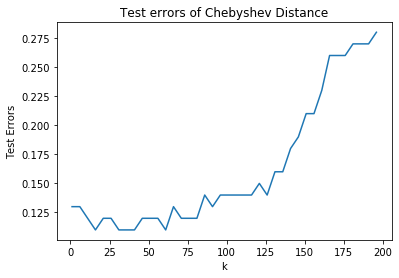

In [36]:
print("Test errors of Chebyshev Distance at different k is")
print(c_test_scores)
plt.plot(*zip(*c_test_scores))
plt.xlabel("k")
plt.ylabel("Test Errors")
plt.title("Test errors of Chebyshev Distance")

The lowest test error value for Chebshev Distance is 0.109 at k=16,31,36,41,61

The best k would be the one with the least overfitting which is usually with a large k 

Also, according to the graph, the test errors only increase after k=61

Therefore the optimal k value is 61

In [37]:
print("Test errors for the best k values in different metrics using Weighed Decision")
n_list=[["Euclidean",6,0.099],["Manhattan",26,0.099],["Chebyshev",61,0.109]]
print("| Distance Metric | K value   | Test Error")
for item in n_list:
    print("|", item[0], " "*(14-len(item[0])), "|", item[1], " "*(8-len(str(item[1]))), "|", item[2], " "*(9-len(str(item[2]))))

Test errors for the best k values in different metrics using Weighed Decision
| Distance Metric | K value   | Test Error
| Euclidean       | 6         | 0.099     
| Manhattan       | 26        | 0.099     
| Chebyshev       | 61        | 0.109     


Both Euclidean and Manhattan distance metric have low test error values. But, Manhattan has a higher k value which would mean less overfitting and more ability to form generalizations.

Therefore, Manhattan distance metric is the best way to find the test errors using weighed decision.

Chebyshev distance metric uses a large k value which would mean less overfitting and a smoother graph to make generalizations. 

In [38]:
print("Train errors for the best k values in different metrics using Majority Polling")
n_list=[["Euclidean",10,0.133],["Manhattan",16,0.133],["Chebyshev",21,0.133],["Mahalanobis",6,0.119]]
print("| Distance Metric | K value   | Test Error")
for item in n_list:
    print("|", item[0], " "*(14-len(item[0])), "|", item[1], " "*(8-len(str(item[1]))), "|", item[2], " "*(9-len(str(item[2]))))

Train errors for the best k values in different metrics using Majority Polling
| Distance Metric | K value   | Test Error
| Euclidean       | 10        | 0.133     
| Manhattan       | 16        | 0.133     
| Chebyshev       | 21        | 0.133     
| Mahalanobis     | 6         | 0.119     


The training error for majority polling is always 0 for k=1. 
In this exercise I have ignored the training error value for k=1 and found the next value of k with the least training error. 

The least value of training erros using majority polling in the table is 0.119 of Mahalanobis Distance at k=6 which is a good way to find training errors but it uses a small value of k which may result into overfitting. 

For Weighed Decisions, the training errors for all values of k is 0

Lowest Training error rate achieved in this homework is 0.119
